# ML Assignment 4 :-
# Q10 : Mean-Shift Clustering for Image Segmentation
- Python Coding Assignment: Mean-Shift Clustering for Image Segmentation Tasks: 
1. Mean-Shift Clustering Implementation: 

    • Implement the mean-shift clustering algorithm using Python.

    • The algorithm should take input parameters such as the bandwidth (radius) and the number of iterations.
    
    • The algorithm should output each data point's cluster centers and corresponding labels. 

2. Image Loading:

    • Load a sample image of your choice using a Python image processing library (e.g., OpenCV or PIL).

3. Image Preprocessing: 

    • Convert the image to a feature space suitable for clustering (e.g., RGB to LAB color space conversion).

    • Flatten the image into a 2D array to use as input for clustering.

4. Mean-Shift Clustering for Image Segmentation: 

    • Apply the mean-shift clustering algorithm to segment the image into regions.

    • Visualize the segmented image by assigning each pixel the color of its corresponding cluster center.

5. Experimentation and Evaluation: 
    • Experiment with different bandwidth values and observe their effects on segmentation quality.
    
    • Evaluate the segmentation results qualitatively by visually inspecting the segmented images.

Deliverables:

    • Python script or Jupyter Notebook containing the mean-shift clustering algorithm and image segmentation implementation.
    
    • README file explaining the algorithm, approach, parameter choices, and observations from experimentation.

Resources:

    • You can refer to academic papers or online resources for understanding the mean-shift clustering algorithm.
    
    • Explore image segmentation benchmark repositories such as BSDS500 or MSRC.


#### Name : Sharanya Dasgupta
#### Roll No. : CS2320

In [ ]:
# Mean-Shift Clustering Implementation

import numpy as np

class MeanShift:
    def __init__(self, bandwidth=2, max_iter=100):
        self.bandwidth = bandwidth
        self.max_iter = max_iter

    def fit(self, data):
        centroids = data.copy()
        for it in range(self.max_iter):
            new_centroids = []
            for i in range(len(centroids)):
                point = centroids[i]
                distances = np.linalg.norm(data - point, axis=1)
                within_bandwidth = data[distances < self.bandwidth]
                new_centroid = np.mean(within_bandwidth, axis=0)
                new_centroids.append(new_centroid)
            new_centroids = np.vstack(new_centroids)
            if np.allclose(centroids, new_centroids, atol=1e-3):
                break
            centroids = new_centroids
        labels = self._assign_labels(data, centroids)
        return centroids, labels

    def _assign_labels(self, data, centroids):
        labels = []
        for point in data:
            distances = np.linalg.norm(centroids - point, axis=1)
            labels.append(np.argmin(distances))
        return np.array(labels)

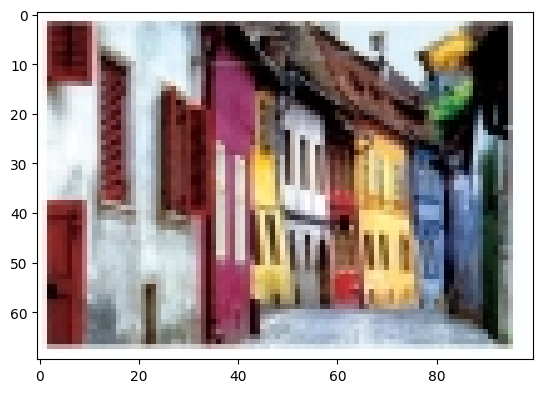

In [ ]:
# Loading Image That is already downloaded

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sample_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
# Image Preprocessing

lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
flat_image = lab_image.reshape((-1, 3))
flat_image

array([[254, 129, 128],
       [253, 128, 128],
       [254, 128, 128],
       ...,
       [254, 128, 127],
       [254, 128, 127],
       [254, 128, 127]], dtype=uint8)

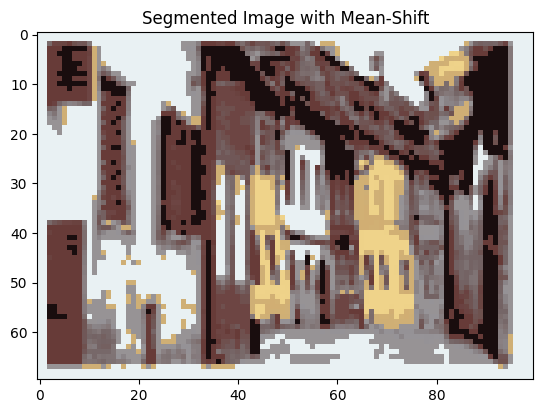

In [ ]:
# Mean-Shift Clustering for Image Segmentation
bandwidth = 30
mean_shift = MeanShift(bandwidth=bandwidth, max_iter=50)

# Fit the model
centroids, labels = mean_shift.fit(flat_image)

# Map the labels to the corresponding centroid colors
segmented_image = centroids[labels].reshape(lab_image.shape).astype(np.uint8)

# Convert back to RGB color space
segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_LAB2RGB)

# Visualize the segmented image
plt.imshow(segmented_image)
plt.title('Segmented Image with Mean-Shift')
plt.show()

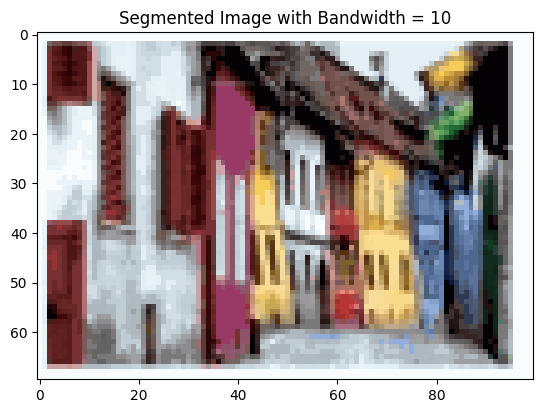

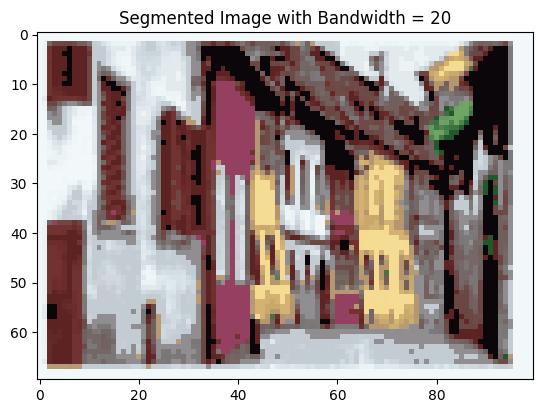

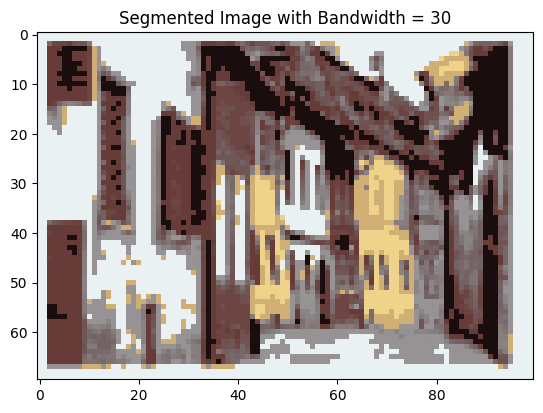

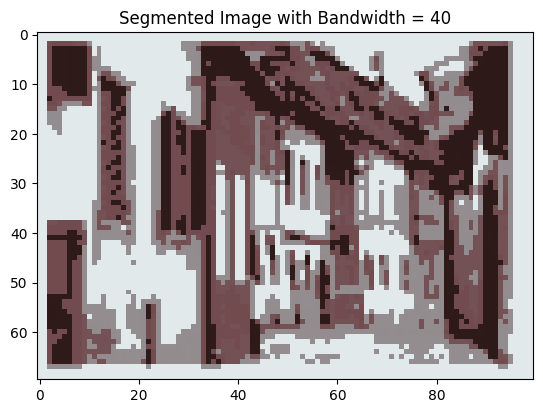

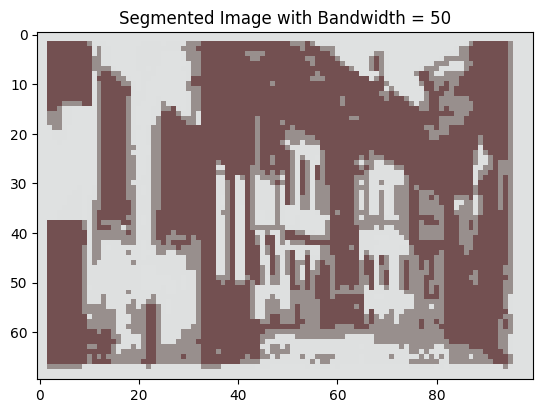

In [ ]:
# Experimentation and Evaluation

bandwidth_values = [10, 20, 30, 40, 50]
for bandwidth in bandwidth_values:
    mean_shift = MeanShift(bandwidth=bandwidth, max_iter=50)
    centroids, labels = mean_shift.fit(flat_image)
    segmented_image = centroids[labels].reshape(lab_image.shape).astype(np.uint8)
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_LAB2RGB)
    plt.imshow(segmented_image)
    plt.title(f'Segmented Image with Bandwidth = {bandwidth}')
    plt.show()

# Mean-Shift Clustering for Image Segmentation

## Introduction
This project implements the Mean-Shift Clustering algorithm for image segmentation. The algorithm is applied to a sample image to segment it into regions.

## Algorithm
Mean shift clustering is a non-parametric iterative mode-based clustering technique based on kernel density estimation. The algorithm finds out the modes(peaks) of the probability distribution. The underlying kernel distribution at the mode corresponds to a cluster The key parameter is the `bandwidth` which defines the radius of the kernel. The mean shift algorithm seeks modes of the given set of points Choose the kernel function and bandwidth parameter For each point:
- Center a window on that point
- Compute the mean of the data in the search window
- Center the search window at the new mean location
- Repeat until convergence Assign points that lead to nearby modes to the same cluster

## Approach
1. **Mean-Shift Clustering Implementation:** The algorithm was implemented with parameters for bandwidth and the number of iterations.
2. **Image Loading:** The sample image is loaded using CV2 and converted to RGB format.
3. **Image Preprocessing:** The image is converted to LAB color space and flattened into a 2D array.
4. **Mean-Shift Clustering for Image Segmentation:** The algorithm is applied to segment the image, and the segmented image is visualized.
5. **Experimentation and Evaluation:** Different bandwidth values are experimented with to observe their effects on segmentation quality.

## Parameter Choices
- **Bandwidth:** Varying the bandwidth affects the size and number of segments. A larger bandwidth results in fewer, larger segments, while a smaller bandwidth results in more, smaller segments.
- **Max Iterations:** Considering the time time required to run the algorithm maximum number of iterations to run the algorithm is set to a default of 50.

## Observations
Through experimentation, it was observed that:
- A bandwidth of 10 results in very fine segmentation with many small segments.
- A bandwidth of 30 provides a balance between segment size and number.
- A bandwidth of 40 results in larger, fewer segments.

## Conclusion
Mean-Shift clustering is effective for image segmentation. The choice of bandwidth is crucial for obtaining desirable segmentation results.

